<a href="https://colab.research.google.com/github/Yaseerkhan001/Zomato-restaurant-clustering-and-sentiment-analysis/blob/main/zomato_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
meta_data = pd.read_csv('/content/drive/MyDrive/Unsupervised Project/Zomato Restaurant names and Metadata.csv')
review = pd.read_csv('/content/drive/MyDrive/Unsupervised Project/Zomato Restaurant reviews.csv')

In [ ]:
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
review.shape

(10000, 7)

In [ ]:
rv = review['Review']
rv

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 10000, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

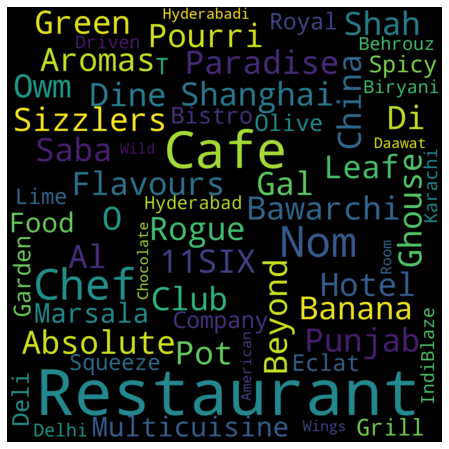

In [ ]:
#Creating word cloud for expensive restaurants
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_data.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

(-0.5, 1399.5, 1399.5, -0.5)

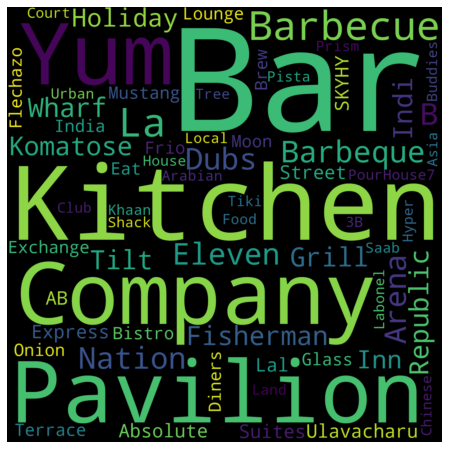

In [ ]:
#Creating word cloud for cheap restaurants

plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_data.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# # Removing stopwords from Cuisines
# meta_data['Cuisines'] = meta_data['Cuisines'].apply(lambda text: stopwords(text))
# meta_data['Cuisines'].head()

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# meta_data['Cuisines'] = meta_data['Cuisines'].apply(lambda x: remove_punctuation(x))
# meta_data['Cuisines'].head()

In [ ]:
import re

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [ ]:
# meta_data['Cuisines'] = meta_data['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
# meta_data['Cuisines'].head()

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [ ]:
# meta_data['Cuisines'] = meta_data['Cuisines'].apply(lambda x: cleaning_numbers(x))
# meta_data['Cuisines'].head()

In [ ]:
from collections import Counter 
text = ' '.join(meta_data['Cuisines'])
words = text.split()

two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}
# two_words

In [ ]:
# word_freq = pd.DataFrame(two_words.items(), columns=['Cuisine_Words', 'Frequency'])
# word_freq = word_freq.sort_values(by = "Frequency", ascending = False)
# word_freq_20 = word_freq[:20]
# word_freq.head()

In [ ]:
# #Wordcloud for Cuisine
# plt.figure(figsize=(15,8))
# text = " ".join(name for name in word_freq.Cuisine_Words )


# # Creating word_cloud with text as argument in .generate() method

# word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# # Display the generated Word Cloud

# plt.imshow(word_cloud, interpolation='bilinear')

# plt.axis("off")

In [ ]:
review.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
review.loc[review['Rating'] == 'Like'] = np.nan
review['Rating']= review['Rating'].astype('float64')

In [ ]:
review.describe()

,Rating,Pictures
count,9961.000000,9999.000000
mean,3.601044,0.748575
std,1.483461,2.570508
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


In [ ]:
review['Rating'].fillna(3.6, inplace=True)

In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers
review['Reviews'],review['Followers']= review['Metadata'].str.split(',').str
review['Reviews'] = pd.to_numeric(review['Reviews'].str.split(' ').str[0])

<ipython-input-121-2ba9395555e7>:2: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [ ]:
review['Followers']= pd.to_numeric(review['Followers'].str.split(' ').str[1])

In [ ]:
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,3.0,2.0


In [ ]:
# Converting Time column into Time, Year, Month, Hour
review['Time']=pd.to_datetime(review['Time'])
review['Year'] = pd.DatetimeIndex(review['Time']).year
review['Month'] = pd.DatetimeIndex(review['Time']).month
review['Hour'] = pd.DatetimeIndex(review['Time']).hour
review = review.drop(['Metadata'], axis =1)

In [ ]:
review.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
review.isna().sum()

Restaurant       1
Reviewer        39
Review          46
Rating           0
Time            39
Pictures         1
Reviews         39
Followers     1617
Year            39
Month           39
Hour            39
dtype: int64

In [ ]:
review['Followers'].fillna(0, inplace = True)
review['Reviews'].fillna(0, inplace = True)

In [ ]:
review.dropna(inplace=True)

In [ ]:
review.reset_index(inplace = True)

In [ ]:
review.isna().sum()

index         0
Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

In [ ]:
review.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
review.describe()

,index,Rating,Pictures,Reviews,Followers,Year,Month,Hour
count,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000,9954.000000
mean,4983.199920,3.600261,0.751959,24.007937,163.122363,2018.452381,6.017079,15.183946
std,2882.485546,1.483573,2.575819,50.631674,620.182806,0.562566,3.160515,6.580345
min,0.000000,1.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,0.000000
25%,2489.250000,3.000000,0.000000,1.000000,1.000000,2018.000000,4.000000,12.000000
50%,4977.500000,4.000000,0.000000,4.000000,7.000000,2018.000000,5.000000,16.000000
75%,7468.750000,5.000000,0.000000,22.000000,63.000000,2019.000000,8.000000,21.000000
max,9999.000000,5.000000,64.000000,1031.000000,13410.000000,2019.000000,12.000000,23.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Ratings')

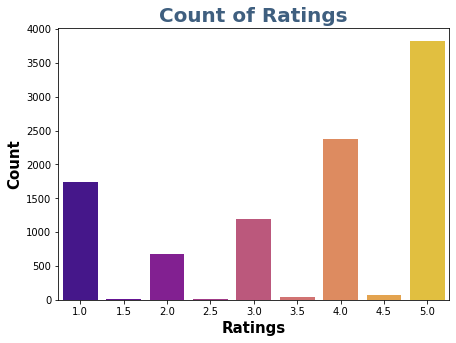

In [ ]:
# Countplot of Ratings
plt.figure(figsize=(7,5))
sns.countplot(review['Rating'],palette="plasma")
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)

(-0.5, 1399.5, 1399.5, -0.5)

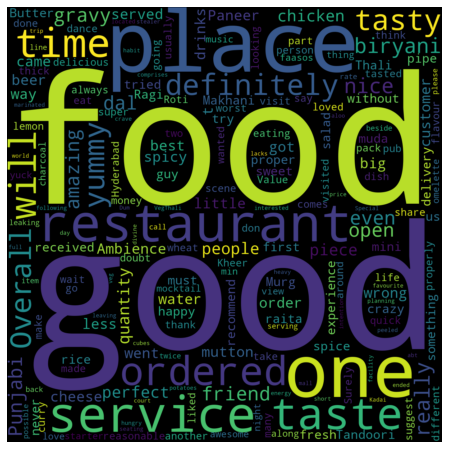

In [ ]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

In [ ]:
review['Review'] = review['Review'].apply(remove_punctuation)

In [ ]:
review['Review'] = review['Review'].apply(stopwords)

In [ ]:
rv = review.Review
rv

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9949    madhumathi mahajan well start nice courteous s...
9950    place never disappointed us food courteous sta...
9951    bad rating mainly chicken bone found veg food ...
9952    personally love prefer chinese food couple tim...
9953    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9954, dtype: object

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [ ]:
rv=lemmatization_(rv)

<ipython-input-139-667b12675f09>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [ ]:
rv = remove_spaces(rv)


<ipython-input-141-96856ab14288>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [ ]:
rv=remove_non_leters(rv)

In [ ]:
review['Review'] = rv
review.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [ ]:
#removing words greater than 45 and less than 2
review['Review']=review['Review'].apply(lambda x:len_less_than2(x))

In [ ]:

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import plotly.express as px


In [ ]:
#Create a function to get the subjectivity
def subjectivity(text): 
    return TextBlob(text).sentiment.subjectivity

In [ ]:
#Create a function to get the polarity
def polarity(text): 
    return TextBlob(text).sentiment.polarity

In [ ]:
#Create two new columns
review['Subjectivity'] = review['Review'].apply(subjectivity)
review['Polarity'] = review['Review'].apply(polarity)

In [ ]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
review['Analysis'] = review['Polarity'].apply(getAnalysis)

In [ ]:
# plot the polarity and subjectivity
fig = px.scatter(review, 
                 x='Polarity', 
                 y='Subjectivity', 
                 color = 'Analysis',
                 size='Subjectivity')

In [ ]:
#add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1, 
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

In [ ]:
review.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour,Subjectivity,Polarity,Analysis
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,1.0,2.0,2019.0,5.0,15.0,0.720000,0.660000,Positive
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,3.0,2.0,2019.0,5.0,14.0,0.691667,0.708333,Positive
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,2.0,3.0,2019.0,5.0,22.0,0.675000,0.550000,Positive
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,1.0,1.0,2019.0,5.0,22.0,0.675000,0.750000,Positive
4,4,Beyond Flavours,Dileep,food goodwe order kodi drumstick basket mutton...,5.0,2019-05-24 21:37:00,0.0,3.0,2.0,2019.0,5.0,21.0,0.566667,0.600000,Positive


In [ ]:
# Converting Analysis into numeric form Postive=0 and Negative =1
def sentiment(analysis):
  if analysis == 'Positive':
    return 0
  elif analysis == 'Neutral' :
    return 0
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [ ]:
review['Analysis']=review['Analysis'].apply(lambda x:sentiment(x))

In [ ]:
sentiment_df= review[['Review','Rating','Analysis']]
sentiment_df.head()

,Review,Rating,Analysis
0,ambience good food quite good saturday lunch c...,5.0,0
1,ambience good pleasant evening service prompt ...,5.0,0
2,must try great food great ambience thnx servic...,5.0,0
3,soumen das arun great guy behavior sincerety g...,5.0,0
4,food goodwe order kodi drumstick basket mutton...,5.0,0


In [ ]:
X = sentiment_df['Review']
y = sentiment_df['Analysis']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=sentiment_df['Analysis'])

In [ ]:
# creating tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

#Classifications

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score, classification_report, f1_score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
def model_details(y_train, y_test, y_pred_train, y_pred_test):
  # Accuracy
  print('-'*50)
  train_accuracy = accuracy_score(y_train,y_pred_train)
  print('Train accuracy is:',train_accuracy)
  test_accuracy = accuracy_score(y_test,y_pred_test)
  print('Test accuracy is:',test_accuracy)
  print('-'*50)
  confusion_mat = confusion_matrix(y_pred_test, y_test)
  print("The confusion matrix on the test data is :")
  print(confusion_mat)
  print('-'*50)
  classification_rep= classification_report(y_pred_test, y_test)
  
  print("The classification report on the train data is :")
  print(classification_rep)


In [ ]:
model_details(y_train,y_test,y_pred_train,y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8341594105827194
Test accuracy is: 0.8304539975893933
--------------------------------------------------
The confusion matrix on the test data is :
[[2016  420]
 [   2   51]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      2436
           1       0.11      0.96      0.19        53

    accuracy                           0.83      2489
   macro avg       0.55      0.89      0.55      2489
weighted avg       0.98      0.83      0.89      2489



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_val_rf = {'n_estimators':[100,150],'max_depth':[10,15],'criterion':['entropy']}
rfg = GridSearchCV(estimator=rf,param_grid=grid_val_rf,scoring='recall',cv=5,verbose=5,n_jobs=-1) 

In [ ]:
rfg.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'n_estimators': [100, 150]},
             scoring='recall', verbose=5)

In [ ]:
rf_y_pred_train = rfg.predict(X_train)
rf_y_pred_test = rfg.predict(X_test)

In [ ]:
model_details(y_train,y_test,rf_y_pred_train,rf_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.8135298057602144
Test accuracy is: 0.8107673764564082
--------------------------------------------------
The confusion matrix on the test data is :
[[2018  471]
 [   0    0]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      2489
           1       0.00      0.00      0.00         0

    accuracy                           0.81      2489
   macro avg       0.50      0.41      0.45      2489
weighted avg       1.00      0.81      0.90      2489



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb_param = {'n_estimators':[100,125,200],'max_depth':[7,10,15],'criterion':['entropy']}
xgb_grid = GridSearchCV(estimator=xgb,param_grid=xgb_param,scoring='recall',cv=2,verbose=5,n_jobs=-1)

In [ ]:
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [7, 10, 15],
                         'n_estimators': [100, 125, 200]},
             scoring='recall', verbose=5)

In [ ]:
xgb_y_pred_train = xgb_grid.predict(X_train)
xgb_y_pred_test = xgb_grid.predict(X_test)

In [ ]:
model_details(y_train,y_test,xgb_y_pred_train,xgb_y_pred_test)

--------------------------------------------------
Train accuracy is: 0.9974547890154052
Test accuracy is: 0.9465648854961832
--------------------------------------------------
The confusion matrix on the test data is :
[[1970   85]
 [  48  386]]
--------------------------------------------------
The classification report on the train data is :
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2055
           1       0.82      0.89      0.85       434

    accuracy                           0.95      2489
   macro avg       0.90      0.92      0.91      2489
weighted avg       0.95      0.95      0.95      2489



In [ ]:
comparison = {'Model_Names':['MultiNomialNB','RandomForest','XGBC'],
               'Training_accuracy':[83,81,99],
               'Testing_accuracy':[82,81,93]}

In [ ]:
cm_df = pd.DataFrame(comparison)
cm_df 

,Model_Names,Training_accuracy,Testing_accuracy
0,MultiNomialNB,83,82
1,RandomForest,81,81
2,XGBC,99,93


#Clustering

In [ ]:
meta_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# changing the data type of the cost function
meta_data['Cost'] = meta_data['Cost'].str.replace(",","").astype('int64')

In [ ]:
cuisine_df = meta_data[['Name','Cost','Cuisines']] 

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Asian, Continental, North Indian, Chinese, Med..."


In [ ]:
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].apply(lambda x: x.lower())

<ipython-input-213-fefe97e0ba6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

<ipython-input-215-c9bd2ab0e326>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[north indian, south indian, chinese, kebab, e..."
1,Paradise,800,"biryani, north indian, chinese","[chinese, north indian, biryani]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[desserts, asian, north indian, mediterranean]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[beverages, north indian, biryani, seafood, ch..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[north indian, mediterranean, asian, chinese, ..."


In [ ]:
cuisine_df = cuisine_df.explode('cuisine')
cuisine_df

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",south indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",kebab
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european
...,...,...,...,...
103,Wich Please,250,fast food,fast food
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",chinese
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",asian
104,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",thai


In [ ]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [ ]:
cuisine_df['cuisine']

0      north indian
0      south indian
0           chinese
0             kebab
0          european
           ...     
103       fast food
104         chinese
104           asian
104            thai
104       malaysian
Name: cuisine, Length: 313, dtype: object

In [ ]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [ ]:
l

['spicy food',
 'Healthy food',
 'fast food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'Dessert',
 'spicy food',
 'spicy food',
 'Healthy food',
 'Dessert',
 'spicy food',
 'spicy food',
 'Healthy food',
 'fast food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'fast food',
 'spicy food',
 'Dessert',
 'Dessert',
 'spicy food',
 'fast food',
 'fast food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'Healthy food',
 'spicy food',
 'fast food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'fast food',
 'fast food',
 'spicy food',
 'fast food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'fast food',
 'spicy food',
 '

In [ ]:
# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,spicy food
1,Healthy food
2,fast food
3,spicy food
4,Healthy food
...,...
308,fast food
309,fast food
310,spicy food
311,Healthy food


In [ ]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)

In [ ]:
dataset.head()

,index,Name,Cost,Cuisines,cuisine
0,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
1,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",Healthy food
2,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",fast food
3,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
4,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",Healthy food


In [ ]:
dataset.drop(['index'],axis=1,inplace=True)

In [ ]:
# generate binary values using get_dummies
dum_df = pd.get_dummies(dataset, columns=["cuisine"],prefix=None)

In [ ]:
dum_df

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_fast food,cuisine_spicy food
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
1,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0
2,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,1,0
3,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,0,0,1
4,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",0,1,0,0
...,...,...,...,...,...,...,...
308,Wich Please,250,fast food,0,0,1,0
309,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,1,0
310,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,0,0,1
311,Republic Of Noodles - Lemon Tree Hotel,1700,"thai, asian, chinese, malaysian",0,1,0,0


In [ ]:
cuisine= ['cuisine_Dessert',
        'cuisine_Healthy food',
        'cuisine_spicy food',
         'cuisine_fast food']

In [ ]:
cluster_df=dum_df.groupby(['Name','Cost','Cuisines'])[cuisine].sum().reset_index()

In [ ]:
cluster_data=cluster_df.drop(['Name','Cuisines'],axis=1)

In [ ]:
cluster_data.head()

,Cost,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food
0,1900,0,0,2,1
1,450,0,0,1,0
2,1100,0,2,1,0
3,1500,0,2,1,0
4,750,0,1,1,1


In [ ]:
meta_data.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

#Standardization


In [ ]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cluster_data_sc = sc.fit_transform(cluster_data)
cluster_data_sc

array([[ 2.04558104, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [-0.81035397, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 0.46989276, -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [ 1.2577369 , -0.45323567,  1.82442995, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567,  0.51233992, -0.28787658,  0.26513915],
       [-0.21947087, -0.45323567,  0.51233992,  1.72725951,  0.26513915],
       [-0.51491242, -0.45323567,  1.82442995, -1.29544463,  1.6571197 ],
       [-1.40123708,  2.82881571, -0.79975012, -1.29544463, -1.12684139],
       [-0.71187346, -0.45323567, -0.79975012,  0.71969146,  0.26513915],
       [ 1.45469793, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [-0.21947087, -0.45323567, -0.79975012,  1.72725951,  0.26513915],
       [-1.30275656, -0.45323567, -0.79975012, -0.28787658, -1.12684139],
       [ 1.45469793, -0.45323567,  0.51233992, -1.29544463, -1.12684139],
       [-0.31795139, -0.45323567,  1.8

In [ ]:
# finding best cluster bu error rate
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(cluster_data_sc)
    sse.append(km.inertia_)

In [ ]:
# finding best clusters by error rate
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit_transform(cluster_data_sc)
    cluster_errors.append( clusters.inertia_ )
    
cluster_errors

[525.0,
 382.26780687385883,
 296.33728585144047,
 255.17585016953,
 224.40381746245993,
 207.66611763627998,
 184.3695823068985,
 164.25599450429087,
 151.67076487161086,
 138.61666613397864,
 127.19537432215193,
 119.28282872298318,
 114.1222925951462,
 109.36465608669087]

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,1,525.000000
1,2,382.267807
2,3,296.337286
3,4,255.175850
4,5,224.403817
5,6,207.666118
6,7,184.369582
7,8,164.255995
8,9,151.670765
9,10,138.616666


Text(0.5, 1.0, 'Sum of squares elbow plot')

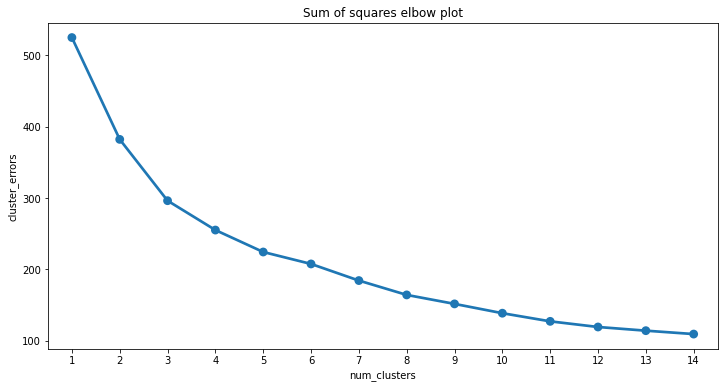

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(x = clusters_df['num_clusters'], y = clusters_df['cluster_errors'])
plt.title('Sum of squares elbow plot')

In [ ]:
#finding best cluster by silhouette score
from sklearn import metrics

k_range = range(2, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cluster_data_sc)
    scores.append(metrics.silhouette_score(cluster_data_sc, km.labels_))

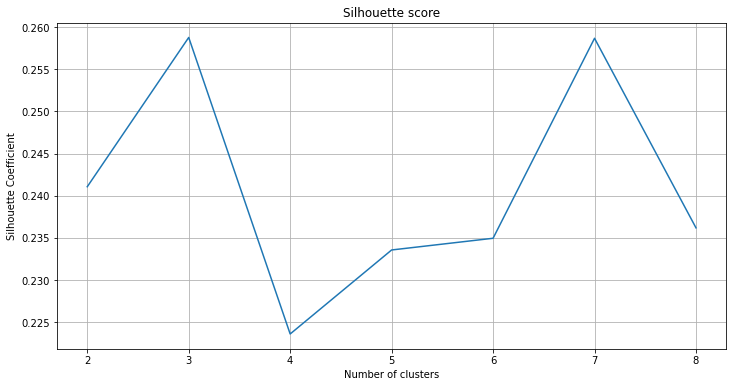

In [ ]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette score')
plt.grid(True)

In [ ]:
X=cluster_data_sc

For n_clusters = 2 The average silhouette_score is : 0.24120120672756099
For n_clusters = 3 The average silhouette_score is : 0.2587638827511183
For n_clusters = 4 The average silhouette_score is : 0.25126065468048375
For n_clusters = 5 The average silhouette_score is : 0.241859442111404
For n_clusters = 6 The average silhouette_score is : 0.24759701223570293
For n_clusters = 7 The average silhouette_score is : 0.22841677996800727
For n_clusters = 8 The average silhouette_score is : 0.25070228913073606
For n_clusters = 9 The average silhouette_score is : 0.2649698819588144
For n_clusters = 10 The average silhouette_score is : 0.2789398583929923
For n_clusters = 11 The average silhouette_score is : 0.3019211637792847
For n_clusters = 12 The average silhouette_score is : 0.2806234071844735
For n_clusters = 13 The average silhouette_score is : 0.30594226175313266
For n_clusters = 14 The average silhouette_score is : 0.2894544033964166
For n_clusters = 15 The average silhouette_score is : 

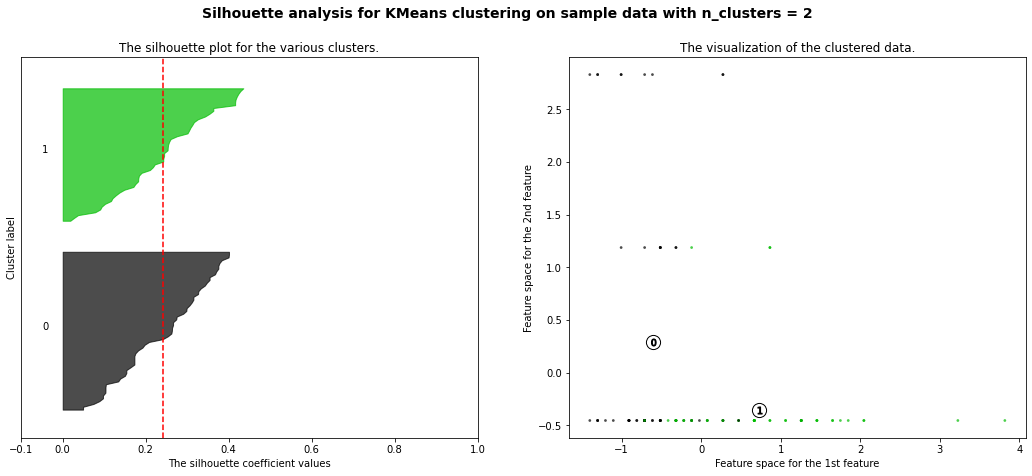

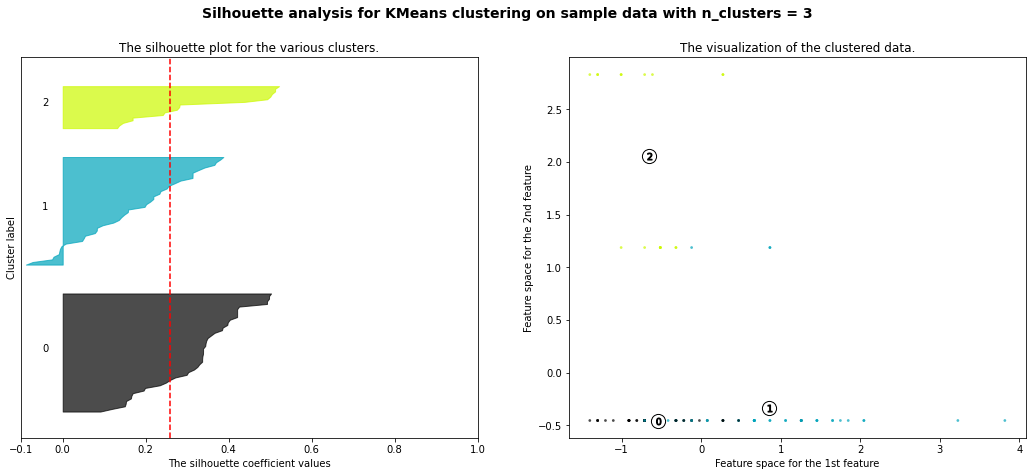

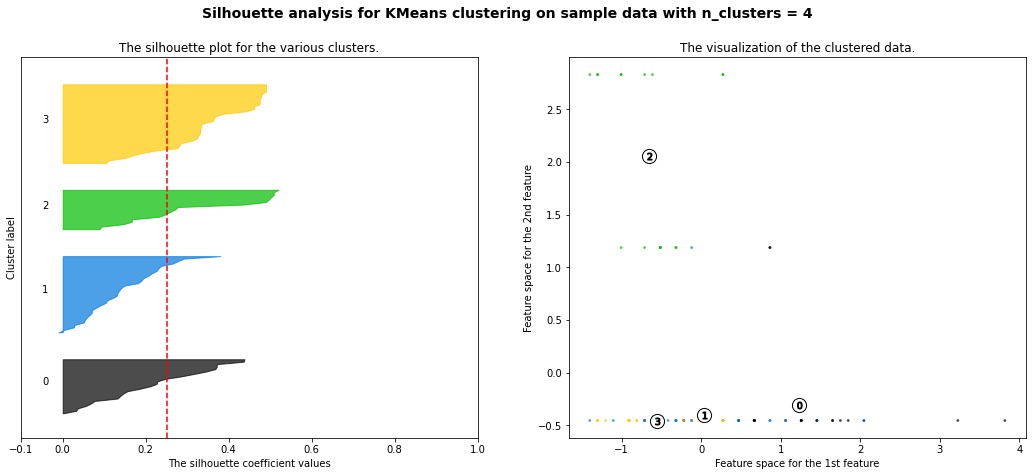

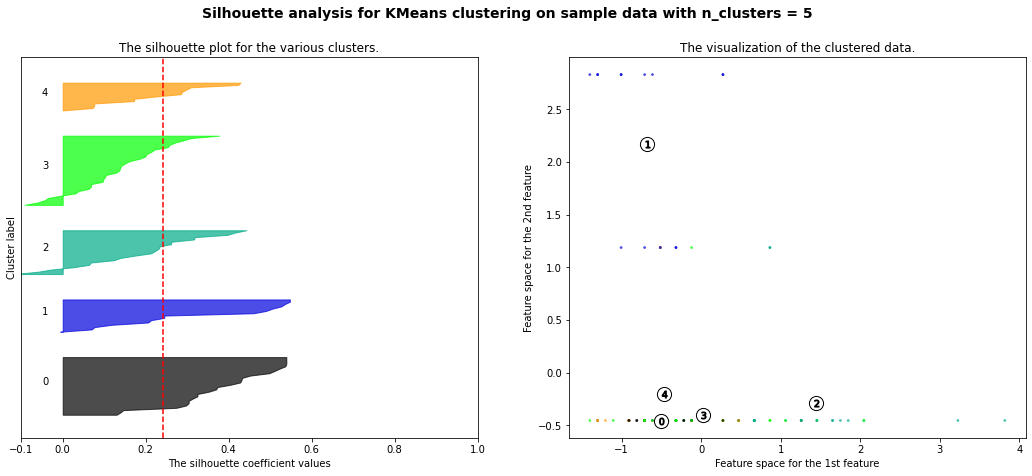

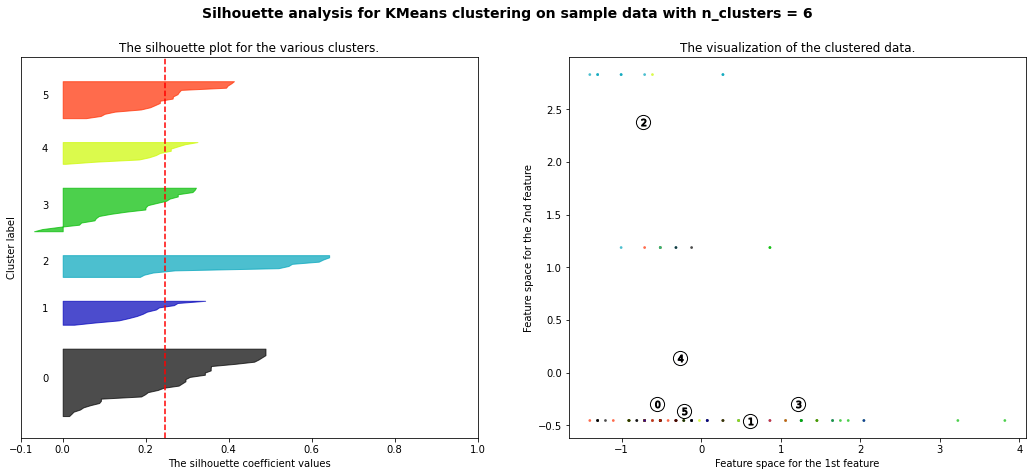

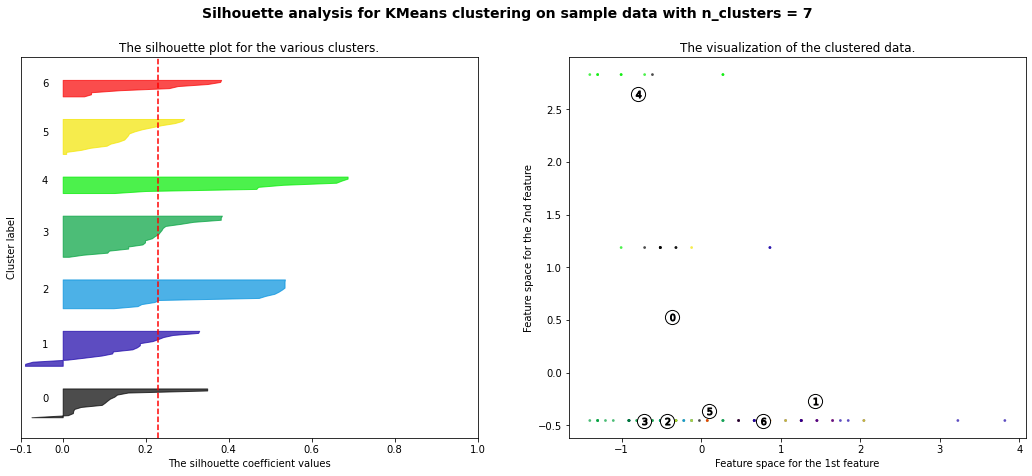

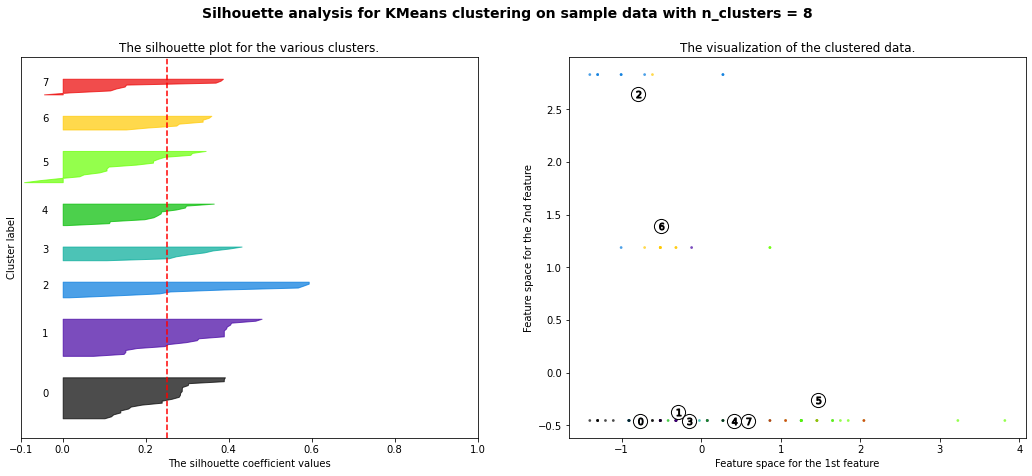

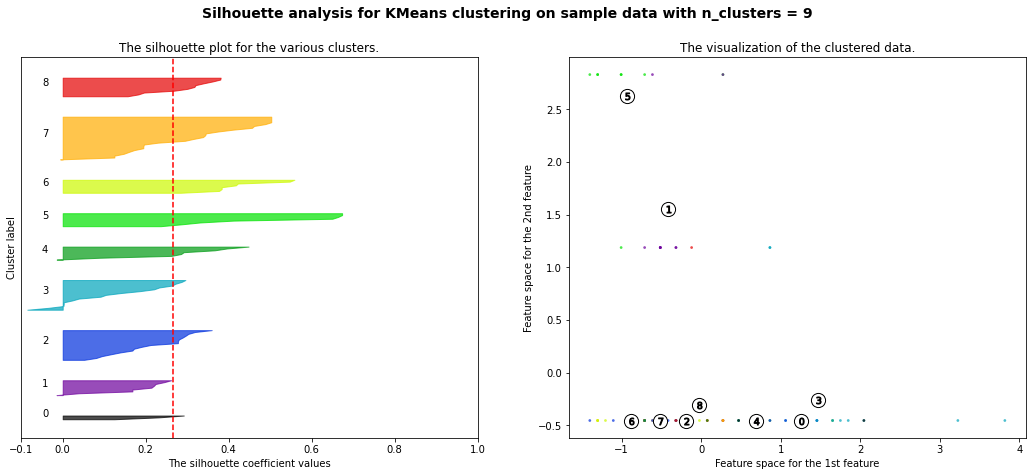

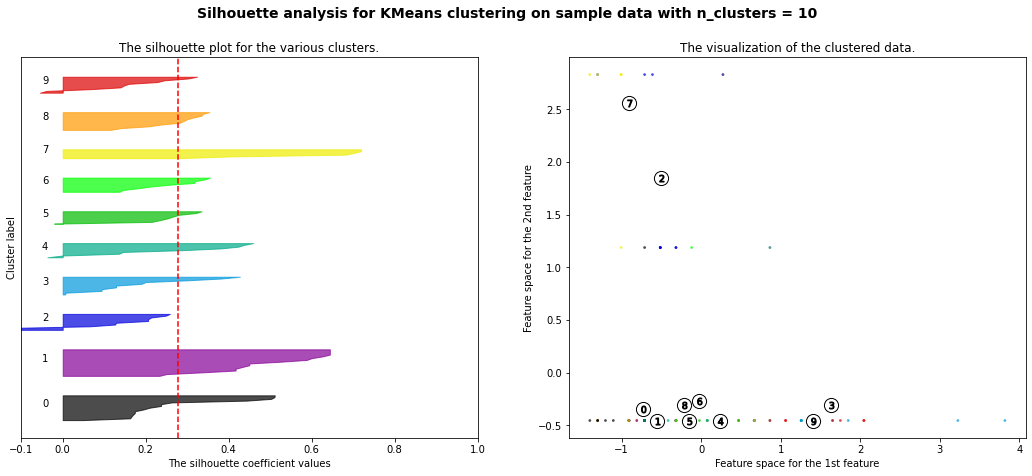

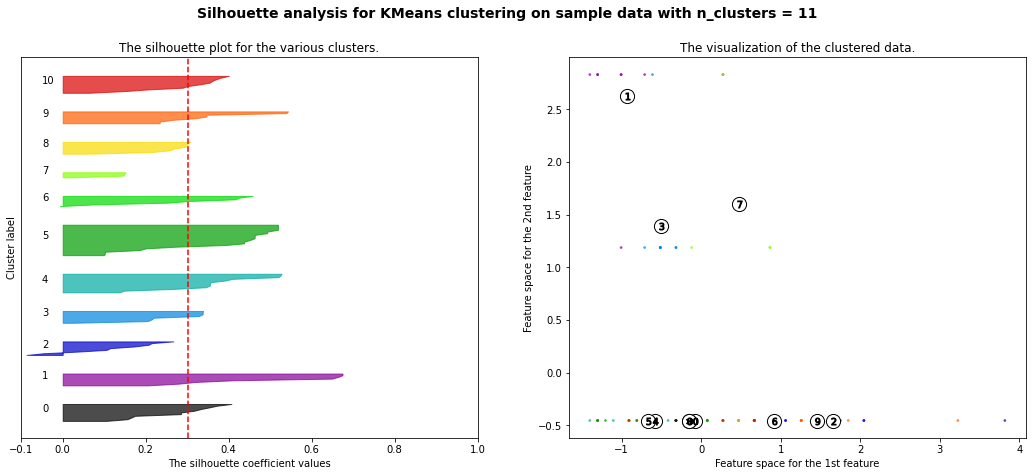

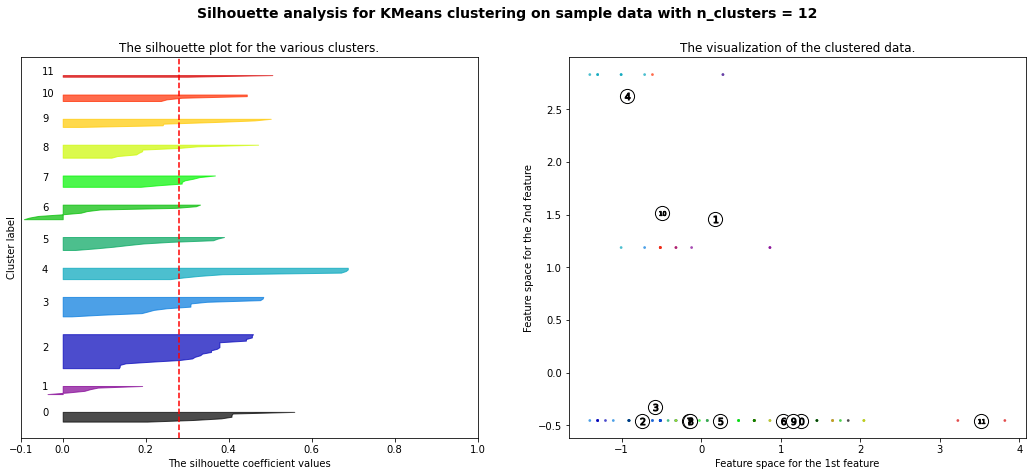

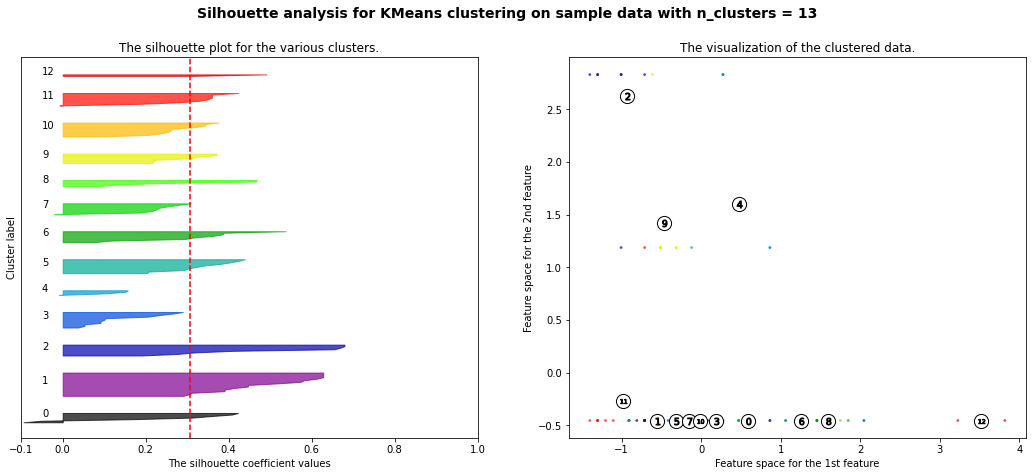

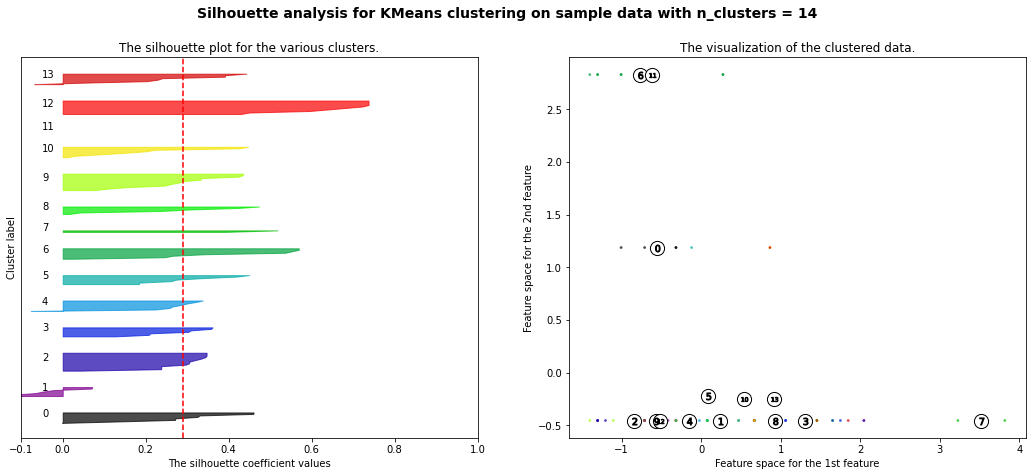

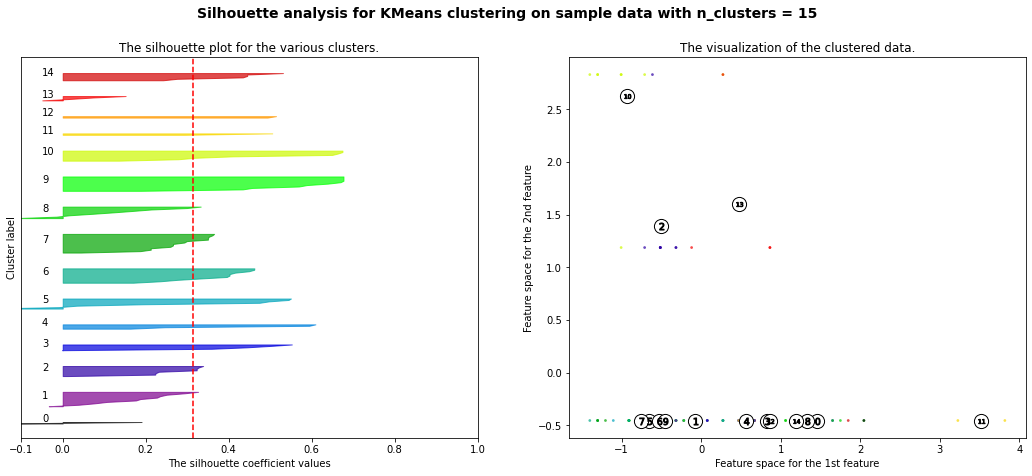

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# Finding the predicted values by kmeans
km = KMeans(n_clusters= 3, n_init= 1000, random_state = 1 )
y_predicted = km.fit_predict(cluster_data_sc)
y_predicted

array([2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

In [ ]:
pd.Series(km.labels_).value_counts()

1    46
2    42
0    17
dtype: int64

In [ ]:
cluster_df['cluster']=y_predicted

In [ ]:
cluster_df

,Name,Cost,Cuisines,cuisine_Dessert,cuisine_Healthy food,cuisine_spicy food,cuisine_fast food,cluster
0,10 Downing Street,1900,"north indian, chinese, continental",0,0,2,1,2
1,13 Dhaba,450,north indian,0,0,1,0,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",0,2,1,0,2
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",0,2,1,0,2
4,Absolute Sizzlers,750,"continental, american, chinese",0,1,1,1,1
...,...,...,...,...,...,...,...,...
100,Wich Please,250,fast food,0,0,0,1,1
101,Yum Yum Tree - The Arabian Food Court,1200,"north indian, hyderabadi",0,0,2,0,2
102,Zega - Sheraton Hyderabad Hotel,1750,"asian, sushi",0,0,1,1,2
103,Zing's Northeast Kitchen,550,"north eastern, momos",0,1,0,1,1


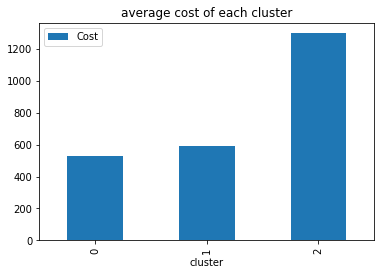

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()

In [ ]:
cluster_df.loc[:,['Name','Cost','Cuisines','cluster']].head(30)

,Name,Cost,Cuisines,cluster
0,10 Downing Street,1900,"north indian, chinese, continental",2
1,13 Dhaba,450,north indian,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",2
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",2
4,Absolute Sizzlers,750,"continental, american, chinese",1
5,Al Saba Restaurant,750,"north indian, chinese, seafood, biryani, hyder...",2
6,American Wild Wings,600,"american, fast food, salad, burger",1
7,Amul,150,"ice cream, desserts",0
8,Angaara Counts 3,500,"north indian, biryani, chinese",1
9,Arena Eleven,1600,continental,2


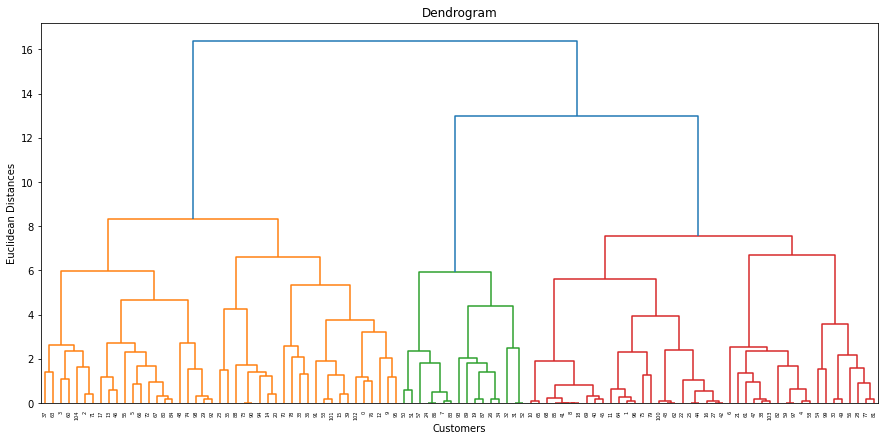

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize= (15,7))
dendrogram = sch.dendrogram(sch.linkage(cluster_data_sc, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show() # find largest vertical distance we can make without crossing any other horizontal line


In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3)
y_hc = hc.fit_predict(cluster_data_sc)
y_hc

array([0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
cluster_df['cluster_hr']=y_hc

In [ ]:
clustering_result = cluster_df.loc[:,['Name','Cost','Cuisines','cluster','cluster_hr']]
clustering_result.head()

,Name,Cost,Cuisines,cluster,cluster_hr
0,10 Downing Street,1900,"north indian, chinese, continental",2,0
1,13 Dhaba,450,north indian,1,1
2,"3B's - Buddies, Bar & Barbecue",1100,"north indian, mediterranean, european",2,0
3,AB's - Absolute Barbecues,1500,"european, mediterranean, north indian",2,0
4,Absolute Sizzlers,750,"continental, american, chinese",1,1


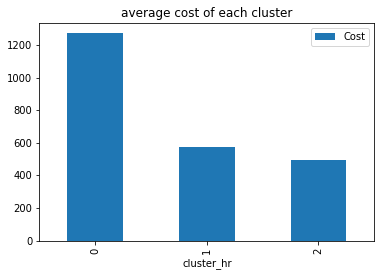

In [ ]:
# ploting average cost of each cluster
pd.DataFrame(cluster_df.groupby('cluster_hr')['Cost'].mean()).plot(kind="bar")
plt.title('average cost of each cluster')
plt.show()